In [75]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [76]:
def simon_oracle(b):
    n = len(b)
    circ = QuantumCircuit(2*n, n)

    for i in range(n):
        circ.cx(i, i+n)

    # for i in range(n):
    #     if b[n-1-i] == '1':
    #         for j in range(n):
    #             if b[j] == '1':
    #                 circ.cx(i, j + n)
    #         break
    for i in range(n):
        if b[n-1-i] == '1':
            circ.cx(i, i+n)

    return circ

In [77]:
b = '0010'
n = len(b)

circ = QuantumCircuit(2*n, n)
circ.h(range(n))
circ.barrier()

circ = circ.compose(simon_oracle(b))

circ.barrier()

circ.h(range(n))

circ.measure(range(n), range(n))

In [78]:
print("the coresponding function should saticfy")
b_dex = int(b, base=2)
for num in range(2**(n-1)):
    print(f"f({num}) = f({num ^ b_dex})")

the coresponding function should saticfy
f(0) = f(2)
f(1) = f(3)
f(2) = f(0)
f(3) = f(1)
f(4) = f(6)
f(5) = f(7)
f(6) = f(4)
f(7) = f(5)


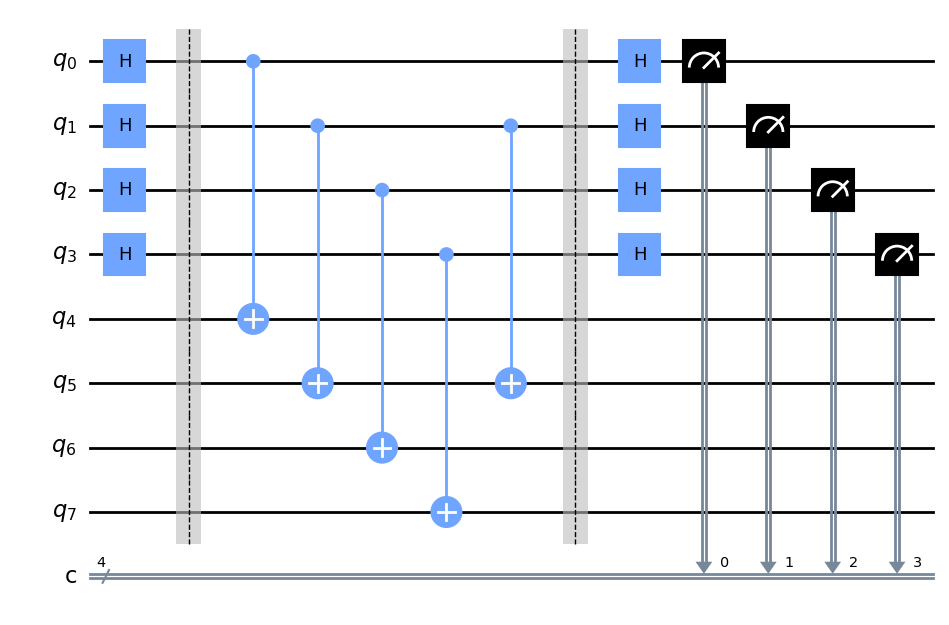

In [79]:
circ.draw('mpl')

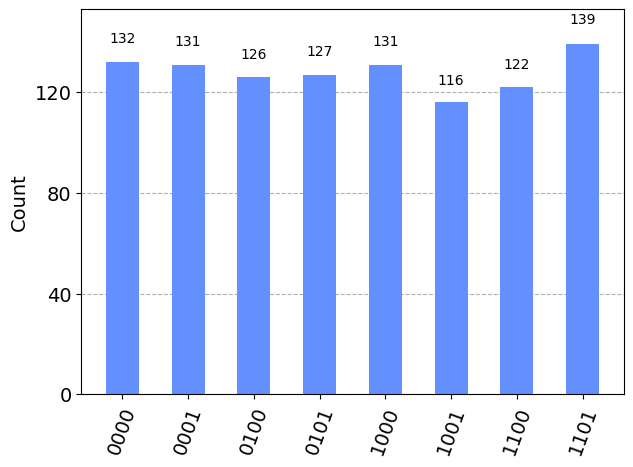

In [80]:
sim = Aer.get_backend("qasm_simulator")
result = execute(circ, backend=sim).result()

plot_histogram(result.get_counts())

In [81]:
#find b

def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

In [82]:
shots = 1024
for z in result.get_counts().keys():
    print( '{} . {} = {} (mod 2) ({:.1f}%)'.format(b, z, bdotz(b,z), result.get_counts()[z]*100/shots))

0010 . 0001 = 0 (mod 2) (12.8%)
0010 . 1001 = 0 (mod 2) (11.3%)
0010 . 1100 = 0 (mod 2) (11.9%)
0010 . 0100 = 0 (mod 2) (12.3%)
0010 . 1101 = 0 (mod 2) (13.6%)
0010 . 1000 = 0 (mod 2) (12.8%)
0010 . 0000 = 0 (mod 2) (12.9%)
0010 . 0101 = 0 (mod 2) (12.4%)
